## <font color=green> Module 4: Hypothesis testing

## Project Objective
Statistical Analysis of Business Data. Explore the dataset and extract insights from the data.

Key Questions to answer:
1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Prove(or disprove) that the medical claims made by the people who smoke is greater than those who don't?
[Hint- Formulate a hypothesis and prove/disprove it]



## Project Objective

Explore and visualize the dataset.
Build a linear regression model to predict the prices of used cars.
Generate a set of insights and recommendations that will help the business

## Assumptions
The Health Insurance Customer's data is a simple random sample from the population data.

## Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.	Univariate Analysis
4.	Bi-Variate Analysis
5.	Variable Transformation / Feature Creation

In [1]:
%matplotlib inline

### Import all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
import scipy.stats as stats
#from sklearn.preprocessing import LabelEncoder
#import copy

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.set_printoptions(precision = 4, suppress = True)

In [3]:
sns.set() #setting the default seaborn style for our plots

### Read the data into the notebook

In [4]:
df = pd.read_csv('Axisinsurance.csv') # read the data as a data frame

### View the first and last 5 rows of the dataset

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Understand the shape of the dataset.

In [7]:
df.shape

(1338, 7)

### Check the data types of the columns for the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* Dataset has 1338 rows and 7 columns.

### Check for missing values

In [9]:
df.isna().sum()   #null value check

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values in  the columns


### Five point summary of continuous variables

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* Data looks legitimate as all the statistics seem reasonable
* Looking at the age column, data looks representative of the true age distribution of the adult population
* Very few people have more than 2 children. 75% of the people have 2 or less children
* The claimed amount is higly skewed as most people would require basic medicare and only few suffer from diseases which cost more.

In [11]:
#Read the file which is in .csv form
df = pd.read_csv('Axisinsurance.csv')
# head displays the first 15 records
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

### Univariate analysis

In [12]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplots and histograms for any input numerical 
# variables.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# This will also help us write faster and cleaner code.
def histogram_boxplot(data, xlabel = None, title = None, font_scale = 2, figsize = (15,7), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    mean = np.mean(data)
    
    # setting the font scale  of the seaborn
    sns.set(font_scale = font_scale) 
    
    # creating the 2 subplot
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios":(.25, .75)}, figsize = figsize) 
    
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data, ax = ax_box2,showmeans = True,color = "violet") 
    
    sns.distplot(data,kde = False, ax = ax_hist2, bins = bins,palette = "winter") if bins else sns.distplot(data,kde = False, ax = ax_hist2,color = "black") 
    
    # mean will shown as vertical line in the histogram
    ax_hist2.axvline(mean, color = 'g', linestyle = '--') 
    
    if xlabel: ax_hist2.set(xlabel = xlabel)
    if title: ax_box2.set(title = title)  
    plt.show() 

### Age

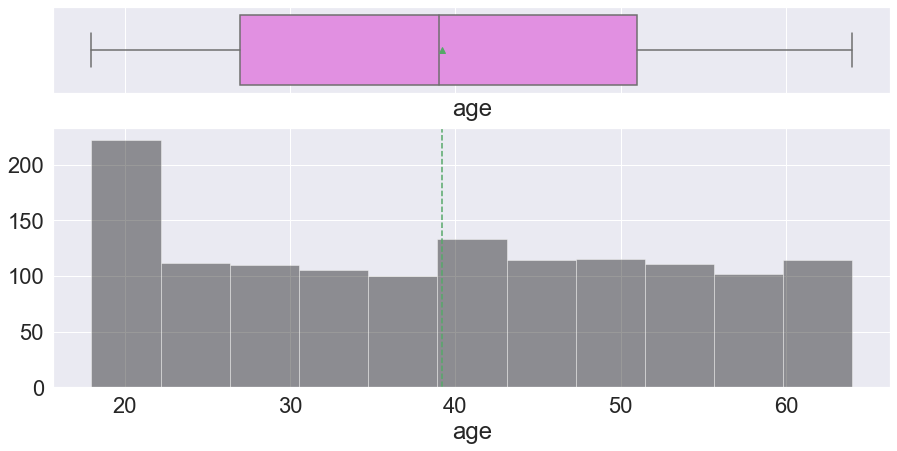

In [13]:
histogram_boxplot(df["age"])

* Age seems uniformly distributed, with both mean and median around 40 years.

### BMI

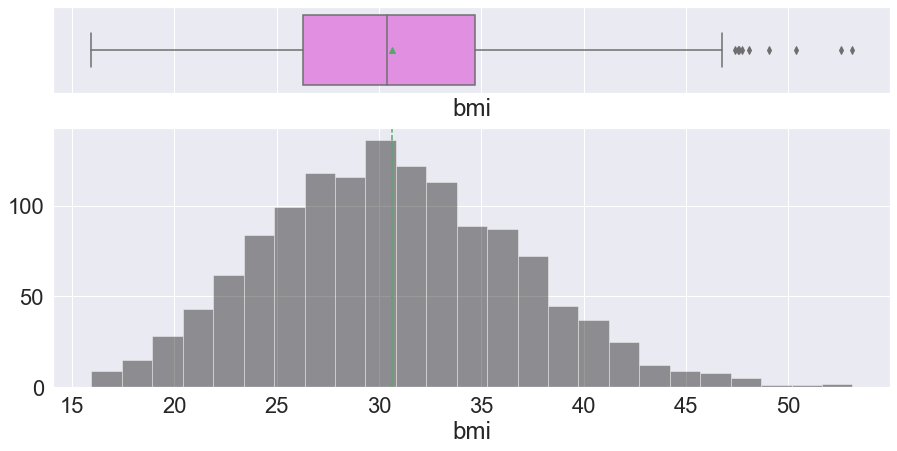

In [14]:
histogram_boxplot(df["bmi"])

* BMI looks to have a fairly normal distribution

### Children

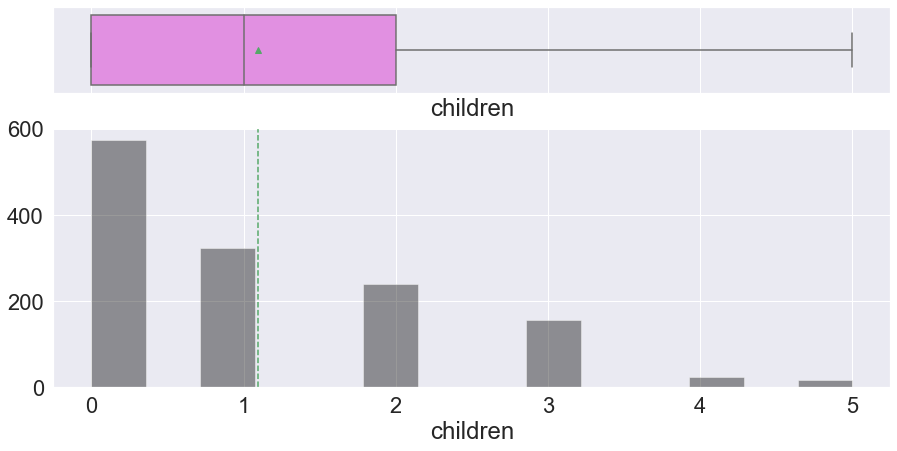

In [15]:
histogram_boxplot(df["children"])

* The number of children has a right skewed distribution.
* The plot suggests that we should convert the children variable to categorical for furthur analysis.

In [5]:
# Converting children to categorical
df['children'] = df['children'].astype('category')

### Charges

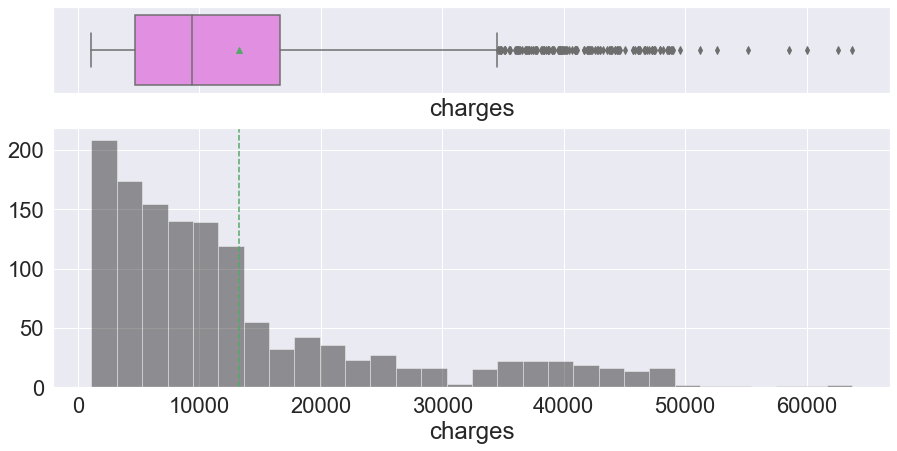

In [17]:
histogram_boxplot(df["charges"])

* Charges have a right skewed distribution. The mean charges is higher than the median charges
* This variable has a lot of outliers towards the higher end indicating that some people spend very high on their medicals.

In [18]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 16) # annotate the percantage 
    plt.show() # show the plot

### Sex

<Figure size 1080x360 with 0 Axes>

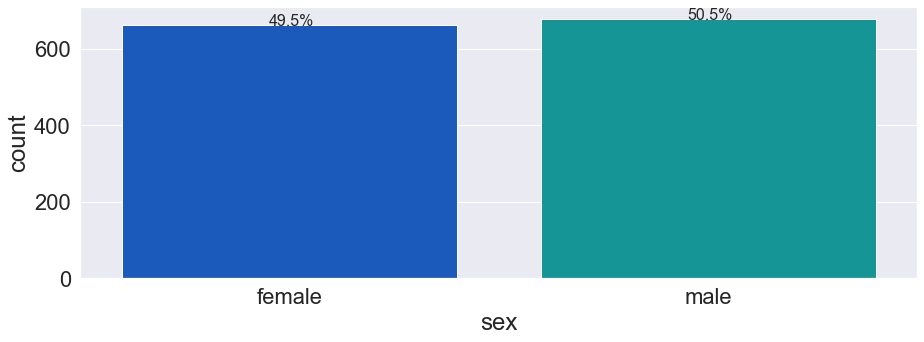

In [19]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["sex"],palette='winter')
perc_on_bar(ax,df["sex"])

* The distribution of observations across genders is fairly similar as we saw earlier as well.

### Children

<Figure size 1080x360 with 0 Axes>

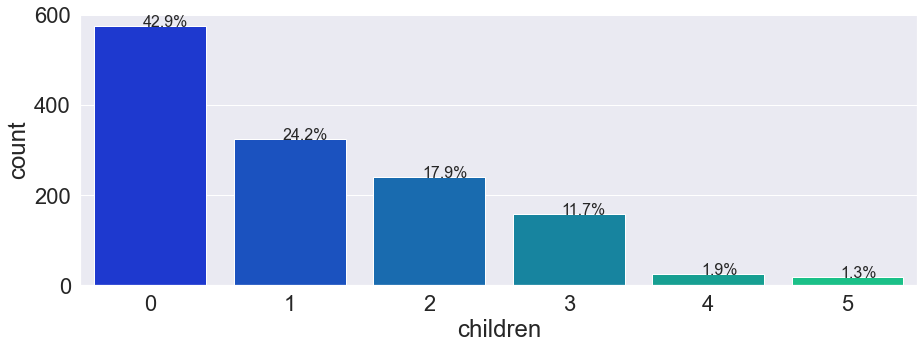

In [20]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["children"],palette='winter')
perc_on_bar(ax,df["children"])

* Nearly 42% insurance holders do not have a child.
* Nearly 42% insurance holders have 1 or 2 children.

### Smoker

<Figure size 1080x360 with 0 Axes>

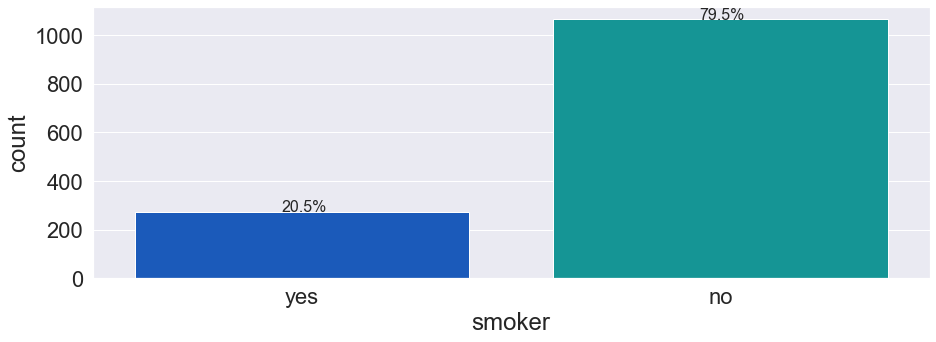

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["smoker"],palette='winter')
perc_on_bar(ax,df["smoker"])

* 20% of the insurace holders are smokers. It will be interesting to see how smoking affects the insurance claims. 

### Region

<Figure size 1080x360 with 0 Axes>

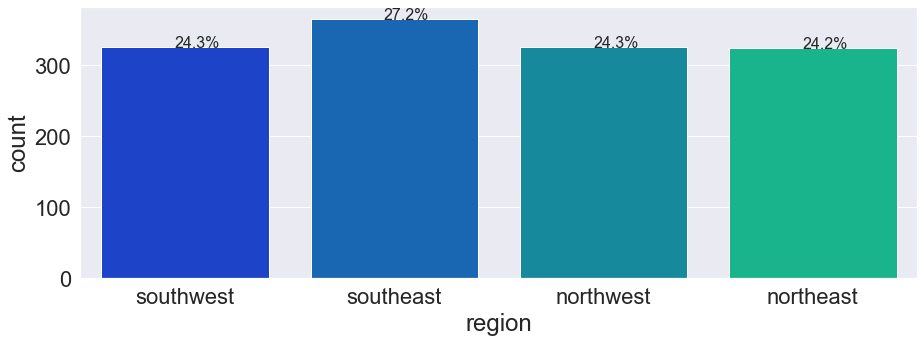

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["region"],palette='winter')
perc_on_bar(ax,df["region"])

* The distribution of insurance holders across various regions of US is fairly uniform. South east region does have ~3% more observations as compared to others but we will have to test if this difference is statistically significant.  

### Bivariate Analysis

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

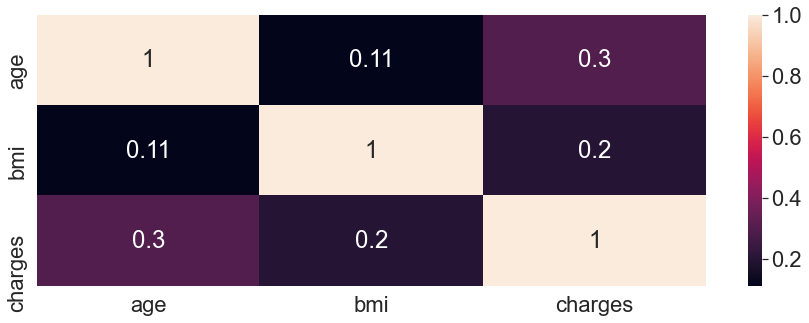

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

* The correlation between between all the continuous variables is positive but not very high.

### Bi-variate distribution of every possible attribute pair

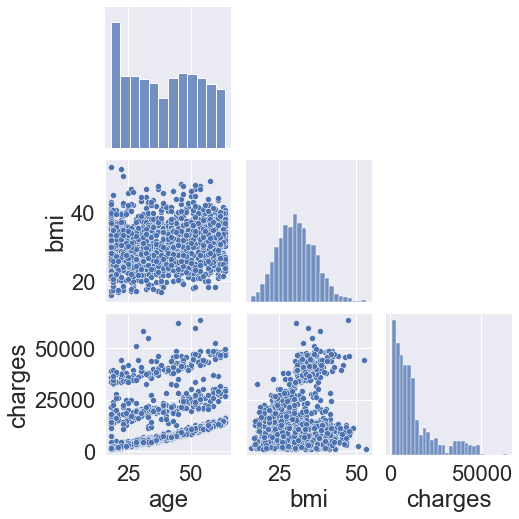

In [24]:
sns.pairplot(df, corner=True)  #pairplot
plt.show()

* There's an interesting pattern between 'age' and 'charges. It is possible that for the same ailment, older people are charged more than the younger ones

# 2.Prove(or disprove)  that the medical claims made by the people who smoke is greater than those who don't? 

* Hint- Formulate a hypothesis and prove/disprove it

In [6]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<font color=blue><font size=3><b>Conclusion: Number of smokers is relatively smaller than non-smokers.... 

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='charges'>

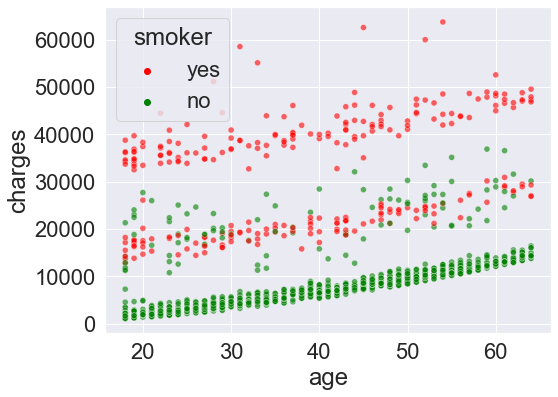

In [26]:
# Scatter plot to look for visual evidence of dependency between smoking and medical costs 
# accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

* Visually the difference between charges of smokers and charges of non-smokers is apparent.
* The non-smokers have much lower medical bill claims compared to the smokers. 
* We will have to perform a two sample t-test(independent) to test to check if the mean charges of smokers is significantly greater than the non-smokers.

### T-test to check dependency of charges on smoking attribute

Null Hypothesis = Ho = "Mean charges of smokers is less than or equal to non-smokers." 

Alternate Hypothesis = Ha = "Mean charges of smokers is greater than non-smokers." 

This will be a one-tailed t-test.

`Significance Level = 0.05`

In [6]:
Ho = "Mean charges of smokers is less than or equal to non-smokers" 
Ha = "Mean charges of smokers is greater than non-smokers" 

x = np.array(df[df['smoker'] == 'yes']['charges'])  # Selecting charges corresponding to smokers as an array
y = np.array(df[df['smoker'] == 'no']['charges']) # Selecting charges corresponding to non-smokers as an array

In [28]:
_, levene_p_value = stats.levene(x, y, center='median')
levene_p_value
#equal_var = False

1.5593284881803726e-66

In [7]:
t, p_value  = stats.ttest_ind(x,y, equal_var = False, alternative = 'greater')  # Performing an Independent t-test
p_value

2.94473222335849e-103

In [8]:
t

32.751887766341824

In [11]:
t_score = stats.t.ppf(q = 1- 0.05, df = 1337)
t_score

1.6459941145571317

In [ ]:
t, p_value  = stats.ttest_ind(x,y, equal_var = False)  # Performing an Independent t-test
p_value

In [9]:
print("Tstat:",t,"P-value:",p_value)

Tstat: 32.751887766341824 P-value: 2.94473222335849e-103


#### Note: The value of the test statistic does not change for a two-tailed test or a one-tailed test. Only the pvalue or the probability value associated with the test statistic changes.

In [31]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Mean charges of smokers is greater than non-smokers as the p_value (2.94473222335849e-103) < 0.05


#### We have the statistical evidence to state that the medical claims made by smokers are higher than the claims made by non-smokers.